<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/98_depresi_1000_and_suicide_cnn_16b_4e_v2_laporan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Install Package yang Dibutuhkan**

In [1]:
pip install emot

In [2]:
pip install emoji

In [3]:
pip install sastrawi

In [4]:
pip install swifter

**#Load Library**

In [5]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import emoji
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


**Preprocessing**

In [6]:
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop['stopwords']
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('indonesian'))
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
user_stopwords = ['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'na',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'ber',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 's','lhaa',
                       'qrt', 'd', 'ayyy', 'eptember', 'tu', 'kat', 'd',
                        'bdhshshhs', 'denngan','ba', 'ah', 'tuu', 'kaann', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'je',
                       '&amp', 'yah', 'x', 'xf', 'xe', 'first', 'second',
                        'the', 'to', 'yaa', 'dirut', 'la', 'pon']
alphabets = list(string.ascii_lowercase)
stop_words_fix = stop_words + alphabets + stop['stopwords'].to_list()

# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    #Remove 'b
    tweet = re.sub(r"b'", '', tweet)
    # Remove urls dan trash
    tweet = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words_fix]
    filtered_words = [w for w in tweet_tokens if w not in user_stopwords]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

def tokenkan(text):    
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")
normalizad_word_dict = {}
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def stopwords_removal(words):
    return [word for word in words if word not in stop_words]

def remove_punct(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

#Import Libraries

In [7]:
import numpy as np
import pandas as pd
from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

In [8]:
df = pd.read_csv('drive/MyDrive/data_psyco/Text_Preprocessing_Depres_Suicide_990_Terbaru_Fix_3.csv').astype(str)
#df = pd.read_csv('drive/MyDrive/data_psyco/Text_Preprocessing_Depres_Suicide_Fix.csv').astype(str)
#df.drop(['Unnamed: 0', 'Postingan', 'Postingan_Tokenkan', 'Postingan_Normalized'], axis=1, inplace=True)
#df.drop(['Unnamed: 0', 'Postingan'], axis=1, inplace=True)
df.columns = ['Category', 'Message']
#df['Message'] = df['Message'].apply(remove_punct)
df.head()

,Category,Message
0,1,depresi cemas rayap
1,1,depresi buru
2,1,depresi terusmenerus
3,1,kali bicara depresi psikologi mata samping jal...
4,1,depresi lelucon marah


0    826
1    824
Name: Category, dtype: int64


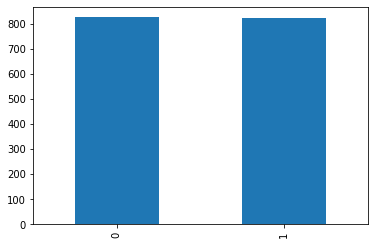

In [9]:
#check the distribution of lebels
labels = df['Category']
labels_count = labels.value_counts()
labels_count.plot(kind="bar")
print(labels.value_counts())

In [10]:
mes = []
for i in df['Message']:
    mes.append(i.split())
print(mes[:2])

[['depresi', 'cemas', 'rayap'], ['depresi', 'buru']]


In [11]:
  word2vec_model = Word2Vec(mes, size=500, window=3, min_count=1, workers=15)
print(word2vec_model)

Word2Vec(vocab=2772, size=500, alpha=0.025)


In [12]:
token = Tokenizer(2772)
token.fit_on_texts(df['Message'])
text = token.texts_to_sequences(df['Message'])
text = pad_sequences(text, 100)
print(text[:2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   7 342]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   1 477]]


In [13]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['Category'])
y = to_categorical(y)
y[:2]

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), y, test_size=0.2, stratify=y)

In [15]:
print(word2vec_model.wv.get_keras_embedding(True))

In [16]:
keras_model = Sequential()
keras_model.add(word2vec_model.wv.get_keras_embedding(True))
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(filters=50, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(filters=50, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(filters=100, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(filters=100, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(MaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Conv1D(filters=200, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(Conv1D(filters=200, kernel_size=3, activation='relu', padding='same', strides=1))
keras_model.add(GlobalMaxPool1D())
keras_model.add(Dropout(0.2))
keras_model.add(Dense(200))
keras_model.add(Activation('relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(2))
keras_model.add(Activation('sigmoid'))
keras_model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='adam')
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 500)         1386000   
_________________________________________________________________
dropout (Dropout)            (None, None, 500)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 50)          75050     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 50)          7550      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 100)         1

In [17]:
history = keras_model.fit(x_train, y_train, batch_size=16, epochs=4, validation_data=(x_test, y_test))

Epoch 1/4
83/83 [==============================] - 9s 92ms/step - loss: 0.6015 - acc: 0.6030 - val_loss: 0.5983 - val_acc: 0.8485
Epoch 2/4
83/83 [==============================] - 7s 87ms/step - loss: 0.3535 - acc: 0.8674 - val_loss: 0.3400 - val_acc: 0.8606
Epoch 3/4
83/83 [==============================] - 7s 89ms/step - loss: 0.2684 - acc: 0.9068 - val_loss: 0.2686 - val_acc: 0.9061
Epoch 4/4
83/83 [==============================] - 7s 87ms/step - loss: 0.1854 - acc: 0.9333 - val_loss: 0.2142 - val_acc: 0.9121


In [18]:
#analyze the results
score, acc = keras_model.evaluate(x_test, y_test, verbose = 2, batch_size=16)
y_pred = keras_model.predict(x_test)
#print(y_pred)

21/21 - 0s - loss: 0.2142 - acc: 0.9121


In [19]:
#Other accuracy metrices
#y_pred = (y_pred > 0.5)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       165
           1       0.92      0.90      0.91       165

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



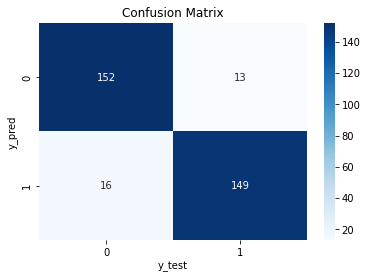

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt='')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

#F1 Score, Recall and Precision
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

In [21]:
import matplotlib.pyplot as plt

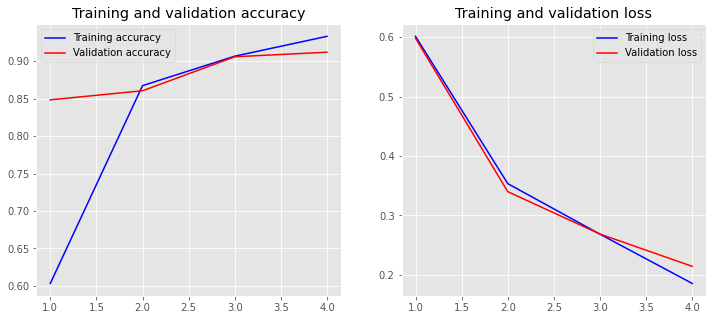

In [22]:
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [27]:
keras_model.save('drive/MyDrive/data_psyco/otw_sidang_sigmoid/98_depresi_1000_and_suicide_cnn_16b_4e_v2_laporan.h5')

# Import Libraries

In [24]:
def text_preprocessing(text):
  df['preprocess_awal'] = text.apply(preprocessTweets)
  df['tokenkan'] = df['preprocess_awal'].apply(tokenkan)
  df['normalized'] = df['tokenkan'].apply(normalized_term)
  df['normalized'] = df['normalized'].apply(stopwords_removal)

  # create stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # stemmed
  def stemmed_wrapper(term):
      return stemmer.stem(term)

  term_dict = {}

  for document in df['normalized']:
      for term in document:
          if term not in term_dict:
              term_dict[term] = ' '
              
  #print(len(term_dict))
  print("------------------------")

  for term in term_dict:
      term_dict[term] = stemmed_wrapper(term)
      print(term,":" ,term_dict[term])
      
  #print(term_dict)
  print("------------------------")


  # apply stemmed term to dataframe
  def get_stemmed_term(document):
      return [term_dict[term] for term in document]

  df['stemmed'] = df['normalized'].swifter.apply(get_stemmed_term)
  #print(df['stemmed'])

  def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

  df['stemmed'] = df['stemmed'].astype(str)
  df['stemmed'] = df['stemmed'].apply(remove_punct)

In [25]:
Xo = 'Aku ingin ice cream'
Yo = 'lelah dengan hidup ini. Nak mati aku dah penat #depresi'
datax = {'Postingan':[Yo]}
df = pd.DataFrame(datax)
text_preprocessing(df['Postingan'])
df.head()

------------------------
lelah : lelah
hidup : hidup
mati : mati
penat : penat
depresi : depresi
------------------------


Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

,Postingan,preprocess_awal,tokenkan,normalized,stemmed
0,lelah dengan hidup ini. Nak mati aku dah penat...,lelah dengan hidup ini nak mati aku dah penat ...,"[lelah, dengan, hidup, ini, nak, mati, aku, da...","[lelah, hidup, mati, penat, depresi]",lelah hidup mati penat depresi


In [26]:
X_sample = token.texts_to_sequences(df['stemmed'])
print(X_sample)
X_sample = pad_sequences(X_sample, 100)
print(X_sample)
y_sample = keras_model.predict(X_sample)
print(y_sample)
hasil = np.argmax(y_sample)

print(hasil)
if (hasil == 0) :
  print('tidak mengidap gangguan psikologis')
else:
  print('mengidap gangguan psikologis')

[[64, 4, 2, 843, 1]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  64   4   2 843   1]]
[[0.00100869 0.9992962 ]]
1
mengidap gangguan psikologis
